# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learning_rate = 0.01
training_epochs = 800
display_step = 50

print("hello")

hello


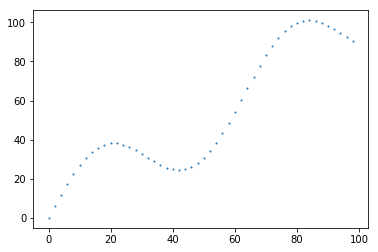

In [2]:
X_data = np.arange(100,step=2)
Y_data = X_data + 20 * np.sin(X_data/10)
plt.scatter(X_data, Y_data, s=1)
plt.show()

In [3]:
# we create a placeholder for the tf graph inputs
X = tf.placeholder("float")
Y = tf.placeholder("float")

n_samples = X_data.shape[0]

In [4]:
# we randomly initialise the weight and and bias
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [5]:
# construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# compute mean squared error
cost = tf.reduce_sum( tf.pow(pred-Y, 2) ) / (2*n_samples)

# initialise gradient descent and tell it to minimize cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# initialise all variables
init = tf.global_variables_initializer()

biases = []
costs = []
weights = []

Epoch: 0001 cost= 125.057884216 W= 0.909294 b= -0.202137
Epoch: 0051 cost= 121.760940552 W= 0.899802 b= 0.737442
Epoch: 0101 cost= 118.986091614 W= 0.891048 b= 1.60403
Epoch: 0151 cost= 116.653381348 W= 0.882974 b= 2.40328
Epoch: 0201 cost= 114.694427490 W= 0.875527 b= 3.14045
Epoch: 0251 cost= 113.051345825 W= 0.868659 b= 3.82034
Epoch: 0301 cost= 111.675315857 W= 0.862324 b= 4.4474
Epoch: 0351 cost= 110.524734497 W= 0.856482 b= 5.02575
Epoch: 0401 cost= 109.564407349 W= 0.851093 b= 5.55917
Epoch: 0451 cost= 108.764358521 W= 0.846123 b= 6.05115
Epoch: 0501 cost= 108.099456787 W= 0.84154 b= 6.50491
Epoch: 0551 cost= 107.548400879 W= 0.837312 b= 6.92341
Epoch: 0601 cost= 107.092796326 W= 0.833413 b= 7.30939
Epoch: 0651 cost= 106.717521667 W= 0.829816 b= 7.66539
Epoch: 0701 cost= 106.409729004 W= 0.826499 b= 7.99373
Epoch: 0751 cost= 106.158126831 W= 0.82344 b= 8.2966
Optimization Finished!
Training cost= 105.958 W= 0.820672 b= 8.57055 



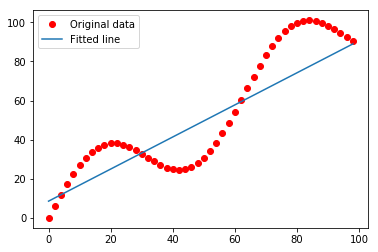

In [8]:
# start the session
with tf.Session() as sess:
    
    # initialise variables
    sess.run(init)
    
    # loop through the number of epoch
    for epoch in range(training_epochs):
        
        # we  our data together
        for (x, y) in zip(X_data, Y_data):
            
            # feed the the x and y values into our optimiser
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        biases.append(sess.run(b))
        costs.append(sess.run(cost, feed_dict={X: X_data, Y:X_data}))
        weights.append(sess.run(W))
            
        # this just prints the stats every 50 steps    
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: X_data, Y:Y_data})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: X_data, Y: Y_data})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(X_data, Y_data, 'ro', label='Original data')
    plt.plot(X_data, sess.run(W) * X_data + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

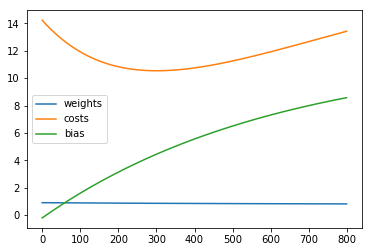

In [11]:
ite = np.arange(100,step=2)
plt.plot(weights,label="weights")
plt.plot(costs,label="costs")
plt.plot(biases,label="bias")
plt.legend()
plt.show()